# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline

# Data Load

| Feature Name         | Description                                  | 단위                | 비고                                      |
|----------------------|----------------------------------------------|---------------------|-------------------------------------------|
| ARI_CO               | 도착항의 소속국가(도착항 앞 2글자)        |                     |                                           |
| ARI_PO               | 도착항의 항구명(도착항 뒤 글자)          |                     |                                           |
| SHIP_TYPE_CATEGORY   | 선종 통합 바탕으로 5대 선종으로 분류     |                     |                                           |
| DIST                 | 정박지(ber_port)와 접안지 사이의 거리     | km                  |                                           |
| ATA                  | anc_port에 도착한 시점의 utc. 실제 정박 시각(Actual Time of Arrival) | hour |                                           |
| ID                   | 선박식별 일련번호                         |                     |                                           |
| BREADTH              | 선박의 폭                                  | m                   |                                           |
| BUILT                | 선박의 연령                                | year                |                                           |
| DEADWEIGHT           | 선박의 재화중량톤수                       | ton                 |                                           |
| DEPTH                | 선박의 깊이                                | m                   |                                           |
| DRAUGHT              | 흘수 높이                                 | m                   |                                           |
| GT                   | 용적톤수(Gross Tonnage)값                | GT(m^3)             |                                           |
| LENGTH               | 선박의 길이                                | m                   |                                           |
| SHIPMANAGER          | 선박 소유주                               |                     |                                           |
| FLAG                 | 선박의 국적                               |                     |                                           |
| U_WIND               | 풍향 u벡터                                | m/s                 |                                           |
| V_WIND               | 풍향 v벡터                                | m/s                 |                                           |
| AIR_TEMPERATURE      | 기온                                       | ºC                  |                                           |
| BN                   | 보퍼트 풍력 계급                           |                     | [보퍼트 풍력 계급](https://ko.wikipedia.org/wiki/보퍼트_풍력_계급) |
| ATA_LT               | anc_port에 도착한 시점의 현지 정박 시각(Local Time of Arrival)(단위 : H) | hour | |
| DUBAI                | 해당일의 두바이유 값                       | dollar              |                                           |
| BRENT                | 해당일의 브렌트유 값                       | dollar              |                                           |
| WTI                  | 해당일의 WTI 값                            | dollar              |                                           |
| BDI_ADJ              | 조정된 벌크운임지수                        |                     |                                           |
| PORT_SIZE            | 접안지 폴리곤 영역의 크기                 | km^2                |                                           |
| CI_HOUR              | 대기시간                                  | hour                | Target                                    |


In [2]:
train = pd.read_csv('../open/train.csv')
test = pd.read_csv('../open/test.csv')

In [3]:
print(train.shape)
display(train.head())

(367441, 27)


,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR
0,TRAIN_000000,CN,EKP8,Bulk,30.736578,2020-10-15 4:03,Z517571,30.0,28,73100,...,3.77,15.9,2.730798,12,42.01,43.16,40.96,1407.668330,0.001660,3.048333
1,TRAIN_000001,CN,EUC8,Container,63.220425,2019-09-17 2:55,U467618,30.0,15,37900,...,-6.72,24.5,4.289058,10,67.53,64.55,59.34,2089.046774,0.001614,17.138611
2,TRAIN_000002,CN,NGG6,Container,90.427421,2019-02-23 6:43,V378315,50.0,7,115000,...,0.00,9.4,0.000000,14,65.30,66.39,56.94,603.193047,0.001743,98.827500
3,TRAIN_000003,JP,TMR7,Cargo,0.000000,2020-09-18 22:06,B726632,10.0,33,1490,...,-7.31,22.1,4.693735,7,43.02,43.15,41.11,1169.853455,0.000069,0.000000
4,TRAIN_000004,RU,NNC2,Container,8.813725,2022-08-13 12:57,D215135,30.0,10,27600,...,2.31,22.8,2.345875,14,90.45,93.65,88.11,1107.944894,0.000197,96.030556


In [4]:
print(test.shape)
display(test.head())

(244989, 26)


,SAMPLE_ID,ARI_CO,ARI_PO,SHIP_TYPE_CATEGORY,DIST,ATA,ID,BREADTH,BUILT,DEADWEIGHT,...,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE
0,TEST_000000,JP,HYG5,Tanker,9.508139,2022-08-27 8:29,R721438,20.0,9,5510,...,0.18,0.63,26.8,0.850060,17,97.88,96.49,89.55,766.977634,0.000256
1,TEST_000001,SG,GIW5,Container,24.186684,2022-03-27 20:57,G185231,40.0,14,109000,...,-0.81,-0.77,27.5,1.213528,4,98.14,104.64,100.60,1655.006791,0.002615
2,TEST_000002,TW,EKP8,Cargo,0.000000,2023-01-18 2:06,P862781,20.0,14,13700,...,-6.25,-12.57,16.1,6.557436,10,83.70,84.98,79.48,682.595117,0.000427
3,TEST_000003,JP,HYG5,Bulk,0.000000,2016-08-02 0:59,B415437,10.0,18,2840,...,NaN,NaN,NaN,NaN,9,38.85,41.80,39.51,629.378100,0.000256
4,TEST_000004,SG,GIW5,Container,19.834186,2023-01-24 0:27,J412562,30.0,23,30700,...,1.58,-4.47,23.8,3.180123,8,83.88,86.13,80.13,563.101921,0.002615


# Data Check

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367441 entries, 0 to 367440
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SAMPLE_ID           367441 non-null  object 
 1   ARI_CO              367441 non-null  object 
 2   ARI_PO              367441 non-null  object 
 3   SHIP_TYPE_CATEGORY  367441 non-null  object 
 4   DIST                367441 non-null  float64
 5   ATA                 367441 non-null  object 
 6   ID                  367441 non-null  object 
 7   BREADTH             367440 non-null  float64
 8   BUILT               367441 non-null  int64  
 9   DEADWEIGHT          367441 non-null  int64  
 10  DEPTH               367440 non-null  float64
 11  DRAUGHT             367440 non-null  float64
 12  GT                  367441 non-null  int64  
 13  LENGTH              367440 non-null  float64
 14  SHIPMANAGER         367441 non-null  object 
 15  FLAG                367441 non-nul

In [6]:
train.isna().sum()

SAMPLE_ID                  0
ARI_CO                     0
ARI_PO                     0
SHIP_TYPE_CATEGORY         0
DIST                       0
ATA                        0
ID                         0
BREADTH                    1
BUILT                      0
DEADWEIGHT                 0
DEPTH                      1
DRAUGHT                    1
GT                         0
LENGTH                     1
SHIPMANAGER                0
FLAG                       0
U_WIND                153486
V_WIND                153486
AIR_TEMPERATURE       154365
BN                    153486
ATA_LT                     0
DUBAI                      0
BRENT                      0
WTI                        0
BDI_ADJ                    0
PORT_SIZE                  0
CI_HOUR                    0
dtype: int64

In [7]:
test.isna().sum()

SAMPLE_ID                  0
ARI_CO                     0
ARI_PO                     0
SHIP_TYPE_CATEGORY         0
DIST                       0
ATA                        0
ID                         0
BREADTH                    0
BUILT                      0
DEADWEIGHT                 0
DEPTH                      0
DRAUGHT                    0
GT                         0
LENGTH                     0
SHIPMANAGER                0
FLAG                       0
U_WIND                101927
V_WIND                101927
AIR_TEMPERATURE       102511
BN                    101927
ATA_LT                     0
DUBAI                      0
BRENT                      0
WTI                        0
BDI_ADJ                    0
PORT_SIZE                  0
dtype: int64

## ARI_CO

In [8]:
sorted(train['ARI_CO'].unique())

['AU',
 'BR',
 'CA',
 'CL',
 'CN',
 'FI',
 'ID',
 'IN',
 'JP',
 'KR',
 'LV',
 'MY',
 'MZ',
 'PE',
 'PH',
 'QA',
 'RU',
 'SG',
 'TT',
 'TW',
 'UA',
 'US',
 'VE',
 'VN',
 'ZA']

In [9]:
sorted(test['ARI_CO'].unique())

['AU',
 'BR',
 'CA',
 'CL',
 'CN',
 'FI',
 'ID',
 'IN',
 'JP',
 'KR',
 'LV',
 'MY',
 'MZ',
 'PE',
 'PH',
 'QA',
 'RU',
 'SG',
 'TT',
 'TW',
 'UA',
 'US',
 'VE',
 'VN',
 'ZA']

## ARI_PO

In [10]:
sorted(train['ARI_PO'].unique())

['AIB7',
 'AZU6',
 'BAZ5',
 'BGD2',
 'BGX4',
 'CEI5',
 'CSP6',
 'CXL1',
 'DEJ2',
 'DIN2',
 'DMD4',
 'EFG4',
 'EIA2',
 'EKP8',
 'EUC8',
 'EVL6',
 'EVX2',
 'FAV3',
 'FCD5',
 'FFM2',
 'FTQ1',
 'GIW5',
 'GQJ7',
 'GRQ5',
 'HGH2',
 'HYG5',
 'HYV6',
 'IEW6',
 'IVU2',
 'JDG8',
 'JEA6',
 'JEN5',
 'JER7',
 'JGL5',
 'JTD1',
 'JWI3',
 'KIU2',
 'KSF1',
 'LHD1',
 'LXJ7',
 'MCG4',
 'MIA8',
 'MMW5',
 'MOC5',
 'NCU8',
 'NGG6',
 'NNC2',
 'NQO4',
 'OBZ3',
 'OKM4',
 'ONW1',
 'OOV8',
 'OZD2',
 'PAF4',
 'PBQ1',
 'PDL4',
 'PEL6',
 'PPM2',
 'PUF3',
 'QEA4',
 'QGL7',
 'QGN3',
 'QQW1',
 'QRN3',
 'QTU5',
 'QXE2',
 'QYY1',
 'REJ1',
 'RGT8',
 'RKA2',
 'SLZ5',
 'SPG1',
 'SXD2',
 'TBL3',
 'TDA5',
 'TMR7',
 'TMW2',
 'TXO3',
 'TYY2',
 'UEW5',
 'UIR7',
 'UJM2',
 'UPI6',
 'URD4',
 'URE2',
 'UVK6',
 'VFD8',
 'VXM8',
 'VYJ1',
 'WAF5',
 'WEY7',
 'WHH4',
 'WXQ2',
 'XEO4',
 'XGX5',
 'XIU1',
 'XVZ3',
 'XZF6',
 'YDP4',
 'YFK5',
 'YRT6',
 'ZAG4',
 'ZME5']

In [11]:
sorted(test['ARI_PO'].unique())

['AIB7',
 'AZU6',
 'BAZ5',
 'BGD2',
 'BGX4',
 'CEI5',
 'CSP6',
 'CXL1',
 'DEJ2',
 'DIN2',
 'DMD4',
 'EFG4',
 'EIA2',
 'EKP8',
 'EUC8',
 'EVL6',
 'EVX2',
 'FAV3',
 'FCD5',
 'FFM2',
 'FTQ1',
 'GIW5',
 'GQJ7',
 'GRQ5',
 'HGH2',
 'HYG5',
 'HYV6',
 'IEW6',
 'IVU2',
 'JDG8',
 'JEA6',
 'JEN5',
 'JER7',
 'JGL5',
 'JTD1',
 'JWI3',
 'KIU2',
 'KSF1',
 'LHD1',
 'LXJ7',
 'MCG4',
 'MIA8',
 'MMW5',
 'MOC5',
 'NCU8',
 'NGG6',
 'NNC2',
 'NQO4',
 'OBZ3',
 'OKM4',
 'ONW1',
 'OOV8',
 'OZD2',
 'PAF4',
 'PBQ1',
 'PDL4',
 'PEL6',
 'PPM2',
 'PUF3',
 'QEA4',
 'QGL7',
 'QGN3',
 'QQW1',
 'QRN3',
 'QTU5',
 'QXE2',
 'QYY1',
 'REJ1',
 'RGT8',
 'RKA2',
 'SLZ5',
 'SPG1',
 'SXD2',
 'TBL3',
 'TDA5',
 'TMR7',
 'TMW2',
 'TXO3',
 'TYY2',
 'UEW5',
 'UIR7',
 'UJM2',
 'UPI6',
 'URD4',
 'URE2',
 'UVK6',
 'VFD8',
 'VXM8',
 'VYJ1',
 'WAF5',
 'WEY7',
 'WHH4',
 'WXQ2',
 'XEO4',
 'XGX5',
 'XIU1',
 'XVZ3',
 'XZF6',
 'YDP4',
 'YFK5',
 'YRT6',
 'ZAG4',
 'ZME5']

In [12]:
print(train['ARI_PO'].nunique())
print(test['ARI_PO'].nunique())

103
103


## SHIP_TYPE_CATEGORY

In [13]:
print(train['SHIP_TYPE_CATEGORY'].nunique())
print(test['SHIP_TYPE_CATEGORY'].nunique())

4
4


In [14]:
sorted(train['SHIP_TYPE_CATEGORY'].unique())

['Bulk', 'Cargo', 'Container', 'Tanker']

In [15]:
sorted(test['SHIP_TYPE_CATEGORY'].unique())

['Bulk', 'Cargo', 'Container', 'Tanker']

## DIST (정박지(ber_port)와 접안지 사이의 거리)

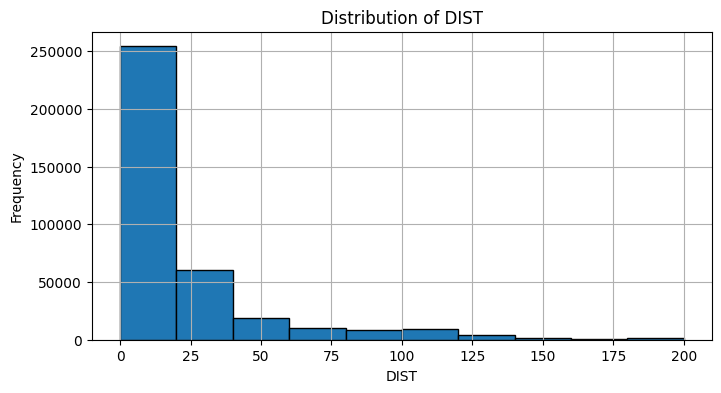

In [16]:
plt.figure(figsize=(8, 4))
plt.hist(train['DIST'], bins=10, edgecolor='k')
plt.title(f'Distribution of DIST')
plt.xlabel('DIST')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## ATA (anc_port에 도착한 시점의 utc. 실제 정박 시각(Actual Time of Arrival))

In [17]:
print(train['ATA'].nunique())
print(train['ATA'].min())
print(train['ATA'].max())

317850
2014-09-01 0:05
2023-02-28 9:43


In [18]:
print(test['ATA'].nunique())
print(test['ATA'].min())
print(test['ATA'].max())

220577
2014-09-01 0:07
2023-02-28 9:52


## ID (선박식별 일련번호)

In [19]:
print(train["ID"].nunique())
print(test["ID"].nunique())

24764
23249


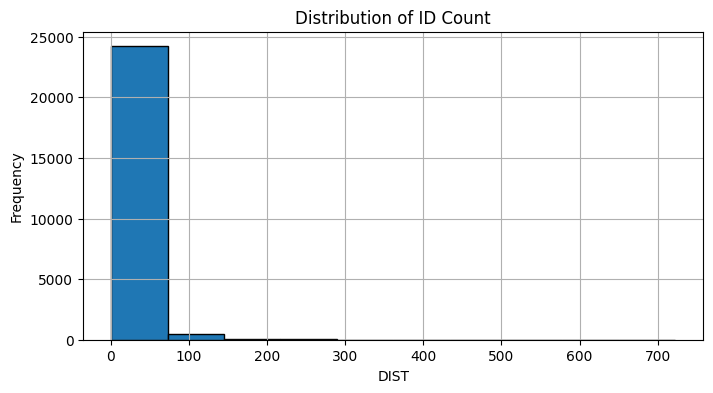

In [20]:
plt.figure(figsize=(8, 4))
plt.hist(train.groupby(['ID'])['ATA'].count(), bins=10, edgecolor='k')
plt.title(f'Distribution of ID Count')
plt.xlabel('DIST')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [21]:
print(train.groupby(['ID'])['ATA'].count().max())
print(train.groupby(['ID'])['ATA'].count().min())

722
1


In [22]:
print(test.groupby(['ID'])['ATA'].count().max())
print(test.groupby(['ID'])['ATA'].count().min())

506
1


## BREADTH (선박의 폭)

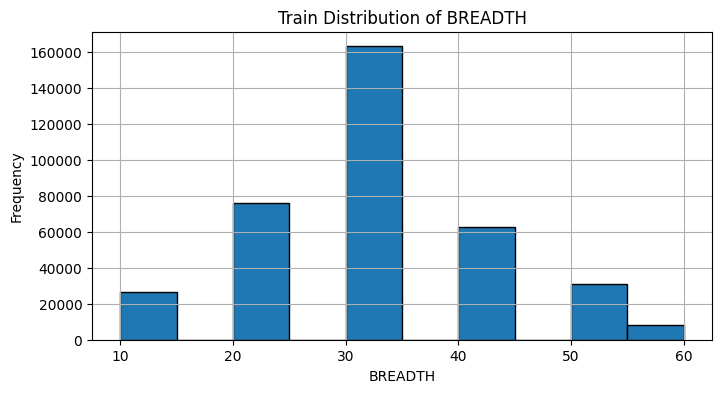

In [23]:
plt.figure(figsize=(8, 4))
plt.hist(train['BREADTH'], bins=10, edgecolor='k')
plt.title(f'Train Distribution of BREADTH')
plt.xlabel('BREADTH')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

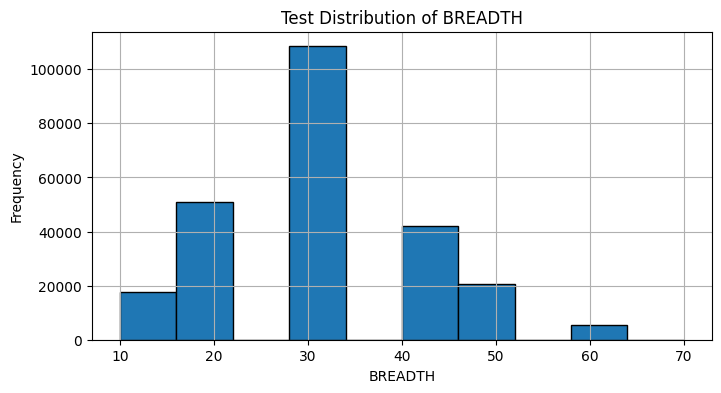

In [24]:
plt.figure(figsize=(8, 4))
plt.hist(test['BREADTH'], bins=10, edgecolor='k')
plt.title(f'Test Distribution of BREADTH')
plt.xlabel('BREADTH')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [25]:
print(train['BREADTH'].max())
print(train['BREADTH'].min())

60.0
10.0


In [26]:
print(test['BREADTH'].max())
print(test['BREADTH'].min())

70.0
10.0


## BUILT (선박의 연령)

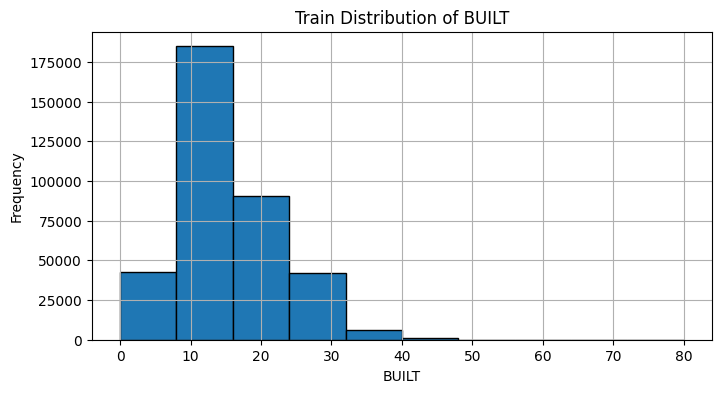

In [27]:
plt.figure(figsize=(8, 4))
plt.hist(train['BUILT'], bins=10, edgecolor='k')
plt.title(f'Train Distribution of BUILT')
plt.xlabel('BUILT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

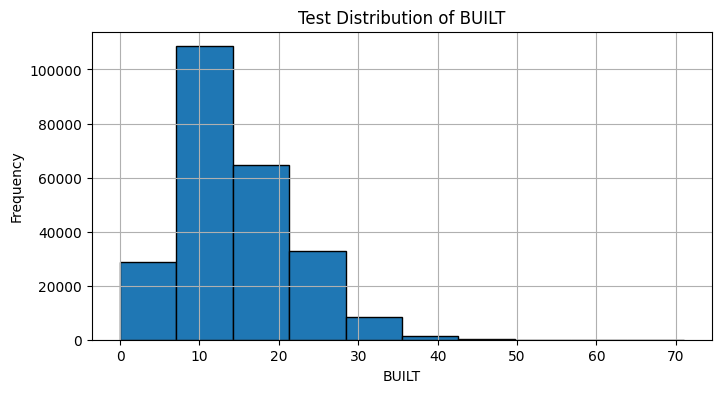

In [28]:
plt.figure(figsize=(8, 4))
plt.hist(test['BUILT'], bins=10, edgecolor='k')
plt.title(f'Test Distribution of BUILT')
plt.xlabel('BUILT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [29]:
print(train['BUILT'].max())
print(train['BUILT'].min())

80
0


In [30]:
print(test['BUILT'].max())
print(test['BUILT'].min())

71
0


## DEADWEIGHT (선박의 재화중량톤수)

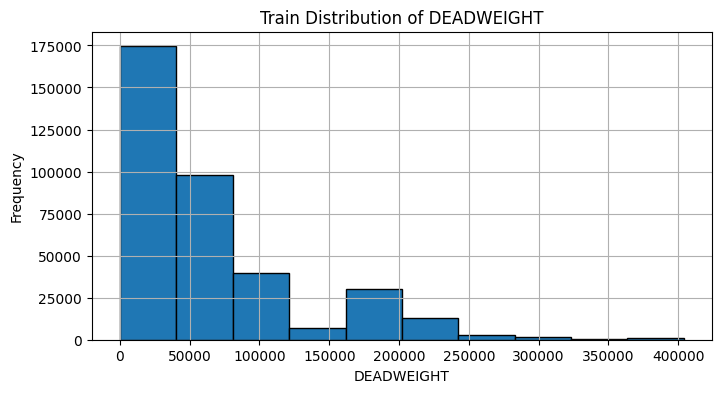

In [31]:
plt.figure(figsize=(8, 4))
plt.hist(train['DEADWEIGHT'], bins=10, edgecolor='k')
plt.title(f'Train Distribution of DEADWEIGHT')
plt.xlabel('DEADWEIGHT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

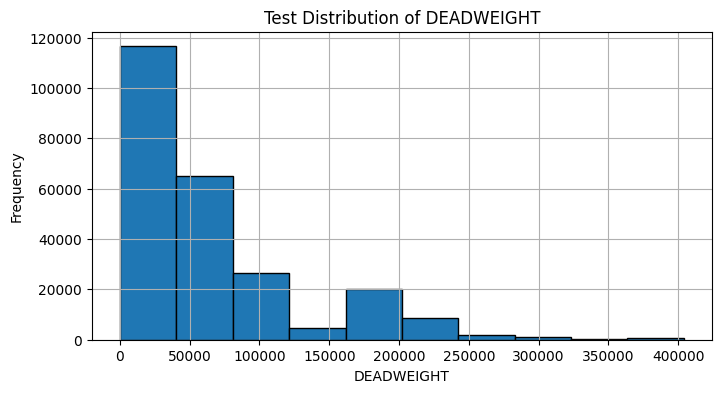

In [32]:
plt.figure(figsize=(8, 4))
plt.hist(test['DEADWEIGHT'], bins=10, edgecolor='k')
plt.title(f'Test Distribution of DEADWEIGHT')
plt.xlabel('DEADWEIGHT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [33]:
print(train['DEADWEIGHT'].max())
print(train['DEADWEIGHT'].min())

404000
100


In [34]:
print(test['DEADWEIGHT'].max())
print(test['DEADWEIGHT'].min())

404000
100


## DEPTH (선박의 깊이)

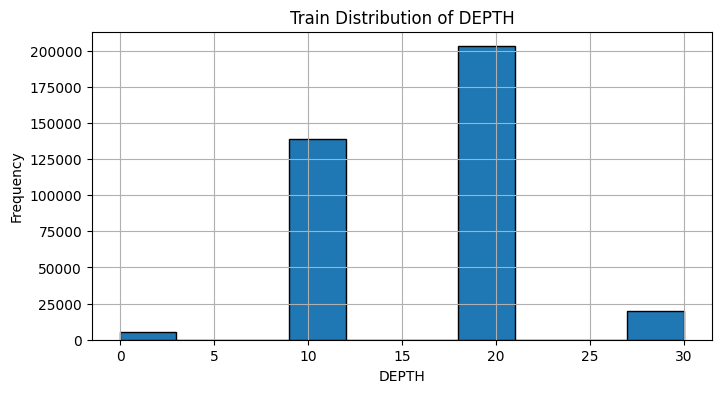

In [35]:
plt.figure(figsize=(8, 4))
plt.hist(train['DEPTH'], bins=10, edgecolor='k')
plt.title(f'Train Distribution of DEPTH')
plt.xlabel('DEPTH')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

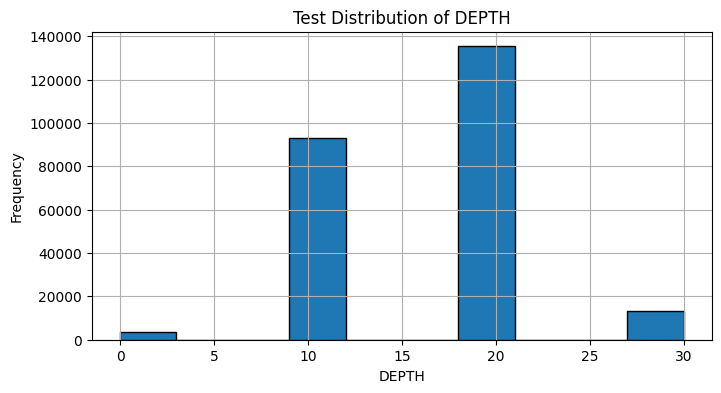

In [36]:
plt.figure(figsize=(8, 4))
plt.hist(test['DEPTH'], bins=10, edgecolor='k')
plt.title(f'Test Distribution of DEPTH')
plt.xlabel('DEPTH')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [37]:
print(train['DEPTH'].max())
print(train['DEPTH'].min())

30.0
0.0


In [38]:
print(test['DEPTH'].max())
print(test['DEPTH'].min())

30.0
0.0


## DRAUGHT (흘수 높이)

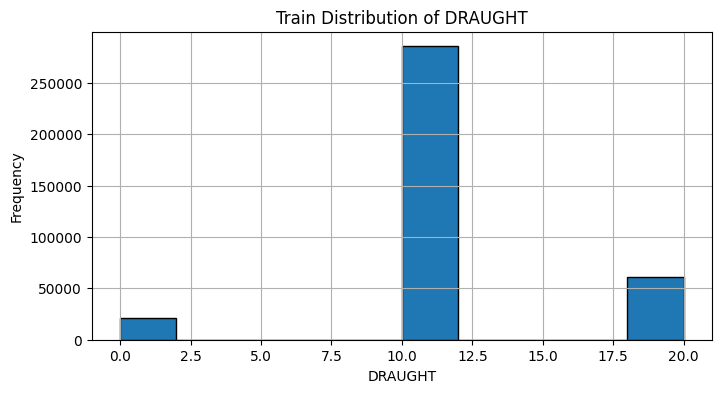

In [39]:
plt.figure(figsize=(8, 4))
plt.hist(train['DRAUGHT'], bins=10, edgecolor='k')
plt.title(f'Train Distribution of DRAUGHT')
plt.xlabel('DRAUGHT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

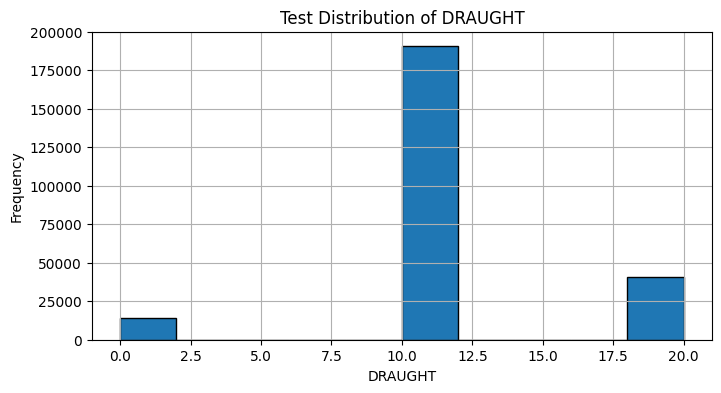

In [40]:
plt.figure(figsize=(8, 4))
plt.hist(test['DRAUGHT'], bins=10, edgecolor='k')
plt.title(f'Test Distribution of DRAUGHT')
plt.xlabel('DRAUGHT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [41]:
print(train['DRAUGHT'].max())
print(train['DRAUGHT'].min())

20.0
0.0


In [42]:
print(test['DRAUGHT'].max())
print(test['DRAUGHT'].min())

20.0
0.0


## GT (용적톤수(Gross Tonnage)값)

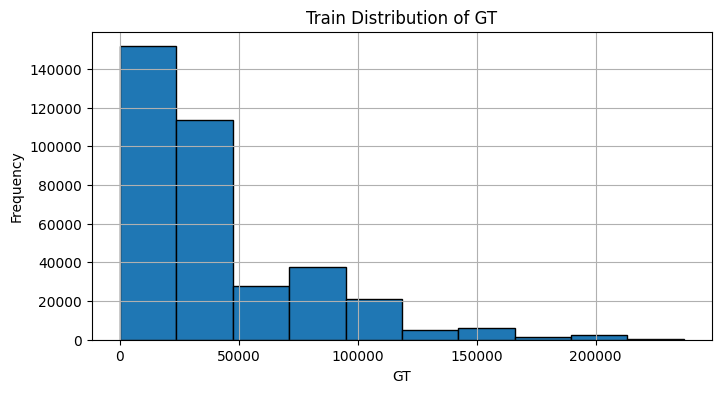

In [43]:
plt.figure(figsize=(8, 4))
plt.hist(train['GT'], bins=10, edgecolor='k')
plt.title(f'Train Distribution of GT')
plt.xlabel('GT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

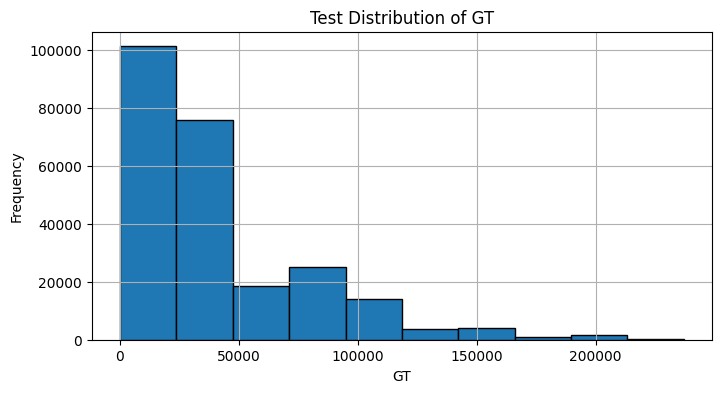

In [44]:
plt.figure(figsize=(8, 4))
plt.hist(test['GT'], bins=10, edgecolor='k')
plt.title(f'Test Distribution of GT')
plt.xlabel('GT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [45]:
print(train['GT'].max())
print(train['GT'].min())

237000
150


In [46]:
print(test['GT'].max())
print(test['GT'].min())

237000
150


## LENGTH  (선박의 길이)

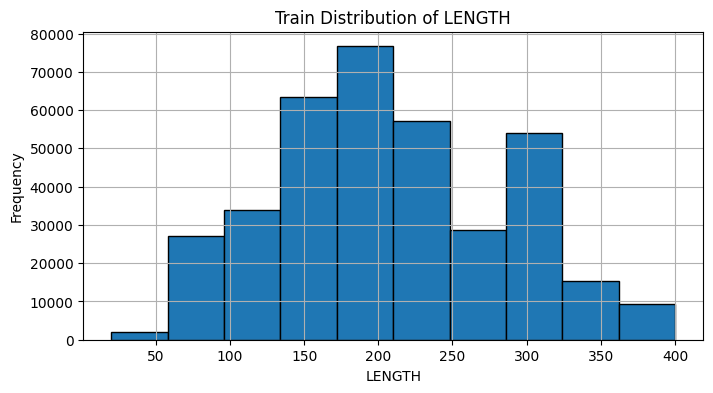

In [47]:
plt.figure(figsize=(8, 4))
plt.hist(train['LENGTH'], bins=10, edgecolor='k')
plt.title(f'Train Distribution of LENGTH')
plt.xlabel('LENGTH')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

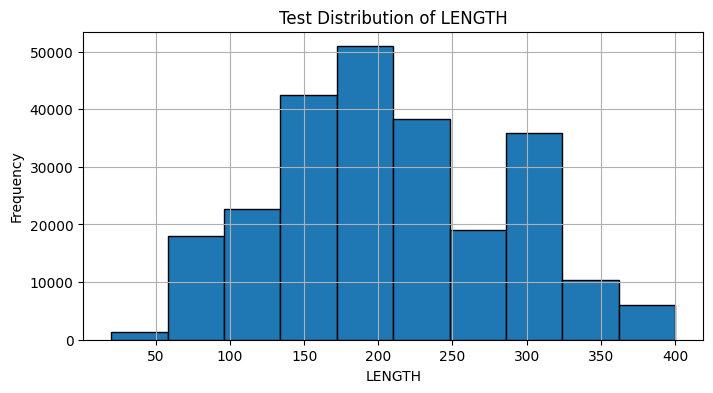

In [48]:
plt.figure(figsize=(8, 4))
plt.hist(test['LENGTH'], bins=10, edgecolor='k')
plt.title(f'Test Distribution of LENGTH')
plt.xlabel('LENGTH')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [49]:
print(train['LENGTH'].max())
print(train['LENGTH'].min())

400.0
20.0


In [50]:
print(test['LENGTH'].max())
print(test['LENGTH'].min())

400.0
20.0


## SHIPMANAGER (선박 소유주)

In [51]:
train['SHIPMANAGER'].nunique()

6511

In [52]:
test['SHIPMANAGER'].nunique()

6195

In [53]:
intersection = list(set(train['SHIPMANAGER'].unique()) & set(test['SHIPMANAGER'].unique()))

In [54]:
len(intersection)

5774

## FLAG (선박의 국적)

In [55]:
train['FLAG'].nunique()

123

In [56]:
test['FLAG'].nunique()

119

In [57]:
intersection = list(set(train['FLAG'].unique()) & set(test['FLAG'].unique()))
len(intersection)

116

## U_WIND (풍향 u벡터)

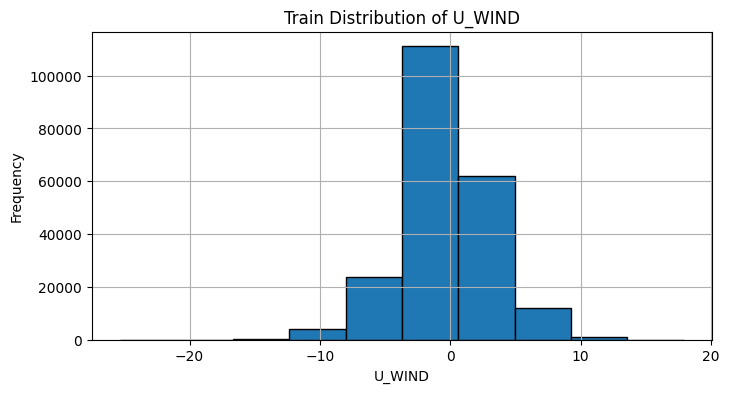

In [58]:
plt.figure(figsize=(8, 4))
plt.hist(train['U_WIND'], bins=10, edgecolor='k')
plt.title(f'Train Distribution of U_WIND')
plt.xlabel('U_WIND')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

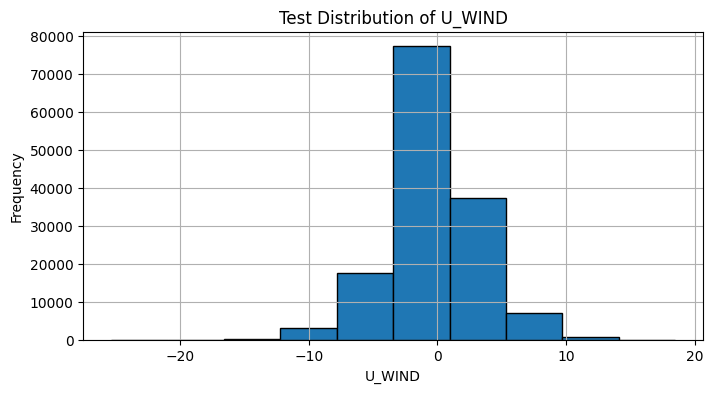

In [59]:
plt.figure(figsize=(8, 4))
plt.hist(test['U_WIND'], bins=10, edgecolor='k')
plt.title(f'Test Distribution of U_WIND')
plt.xlabel('U_WIND')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [60]:
print(train['U_WIND'].max())
print(train['U_WIND'].min())

17.91
-25.33


In [61]:
print(test['U_WIND'].max())
print(test['U_WIND'].min())

18.45
-25.33


## V_WIND (풍향 v벡터)

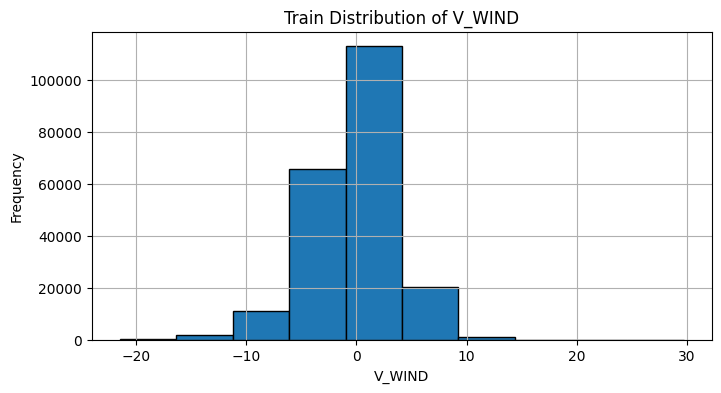

In [62]:
plt.figure(figsize=(8, 4))
plt.hist(train['V_WIND'], bins=10, edgecolor='k')
plt.title(f'Train Distribution of V_WIND')
plt.xlabel('V_WIND')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

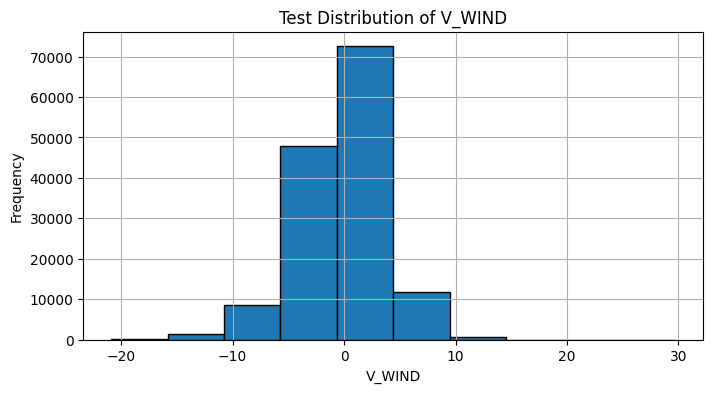

In [63]:
plt.figure(figsize=(8, 4))
plt.hist(test['V_WIND'], bins=10, edgecolor='k')
plt.title(f'Test Distribution of V_WIND')
plt.xlabel('V_WIND')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [64]:
print(train['V_WIND'].max())
print(train['V_WIND'].min())

29.69
-21.45


In [65]:
print(test['V_WIND'].max())
print(test['V_WIND'].min())

29.69
-20.88


## AIR_TEMPERATURE (기온)

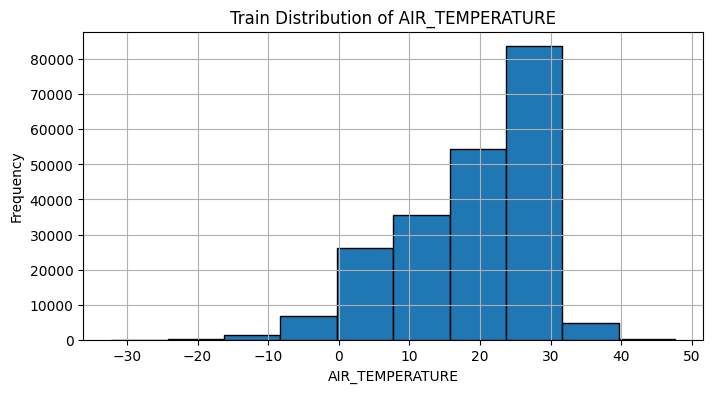

In [66]:
plt.figure(figsize=(8, 4))
plt.hist(train['AIR_TEMPERATURE'], bins=10, edgecolor='k')
plt.title(f'Train Distribution of AIR_TEMPERATURE')
plt.xlabel('AIR_TEMPERATURE')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

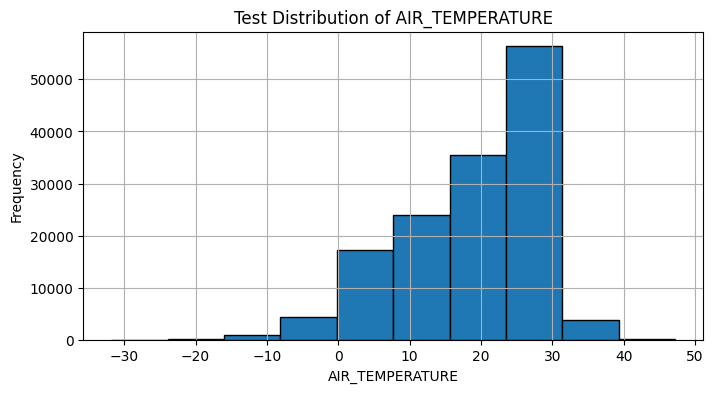

In [67]:
plt.figure(figsize=(8, 4))
plt.hist(test['AIR_TEMPERATURE'], bins=10, edgecolor='k')
plt.title(f'Test Distribution of AIR_TEMPERATURE')
plt.xlabel('AIR_TEMPERATURE')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [68]:
print(train['AIR_TEMPERATURE'].max())
print(train['AIR_TEMPERATURE'].min())

47.6
-32.2


In [69]:
print(test['AIR_TEMPERATURE'].max())
print(test['AIR_TEMPERATURE'].min())

47.2
-31.8


## BN (보퍼트 풍력 계급)

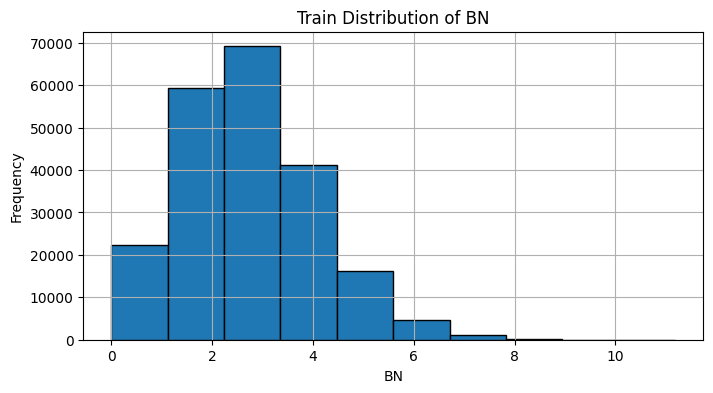

In [70]:
plt.figure(figsize=(8, 4))
plt.hist(train['BN'], bins=10, edgecolor='k')
plt.title(f'Train Distribution of BN')
plt.xlabel('BN')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

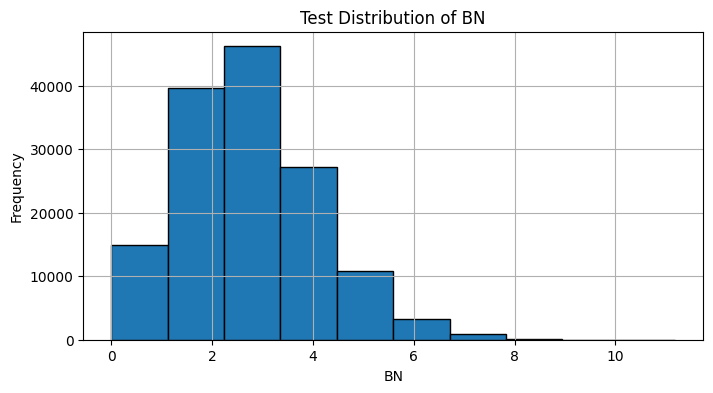

In [71]:
plt.figure(figsize=(8, 4))
plt.hist(test['BN'], bins=10, edgecolor='k')
plt.title(f'Test Distribution of BN')
plt.xlabel('BN')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [72]:
print(train['BN'].max())
print(train['BN'].min())

11.17965971
0.0


In [73]:
print(test['BN'].max())
print(test['BN'].min())

11.17965971
0.0


## ATA_LT (anc_port에 도착한 시점의 현지 정박 시각(Local Time of Arrival)(단위 : H)	)

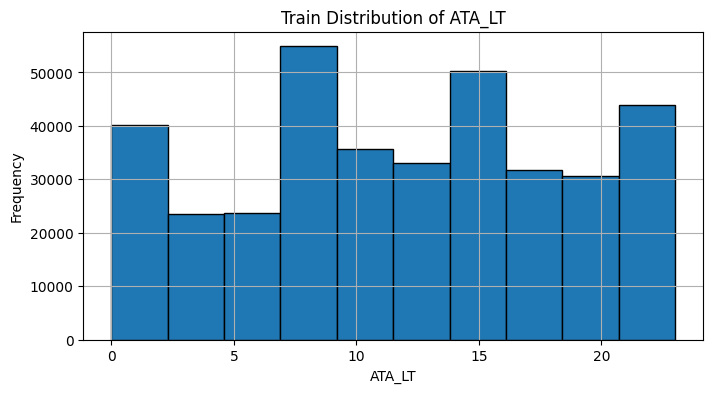

In [74]:
plt.figure(figsize=(8, 4))
plt.hist(train['ATA_LT'], bins=10, edgecolor='k')
plt.title(f'Train Distribution of ATA_LT')
plt.xlabel('ATA_LT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

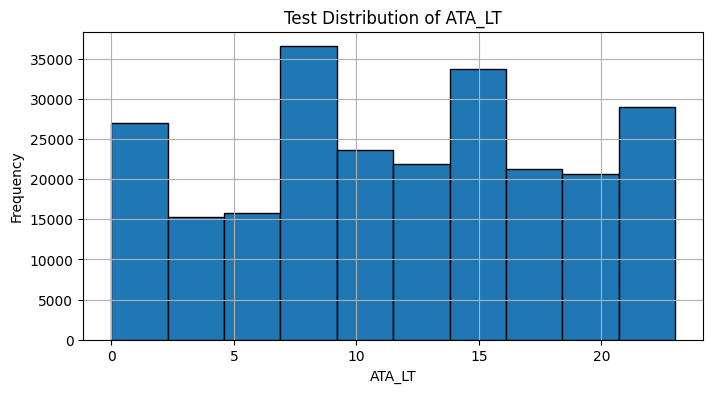

In [75]:
plt.figure(figsize=(8, 4))
plt.hist(test['ATA_LT'], bins=10, edgecolor='k')
plt.title(f'Test Distribution of ATA_LT')
plt.xlabel('ATA_LT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## DUBAI (해당일의 두바이유 값)

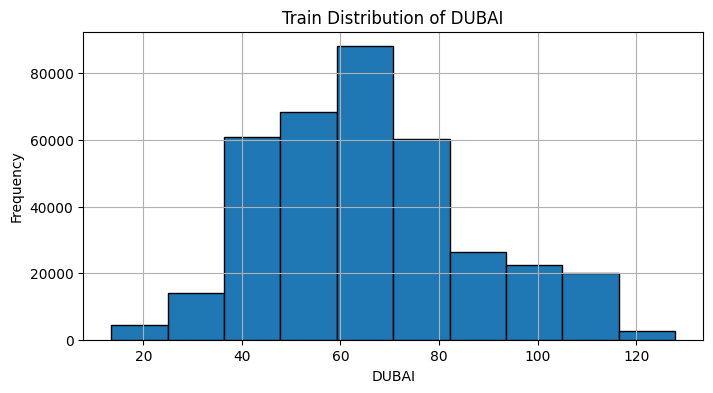

In [76]:
plt.figure(figsize=(8, 4))
plt.hist(train['DUBAI'], bins=10, edgecolor='k')
plt.title(f'Train Distribution of DUBAI')
plt.xlabel('DUBAI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

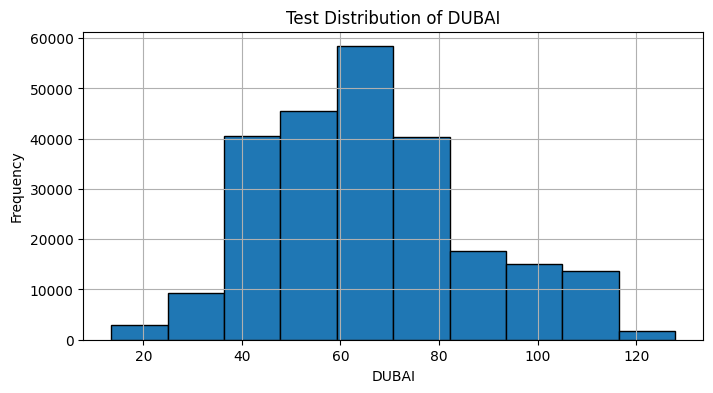

In [77]:
plt.figure(figsize=(8, 4))
plt.hist(test['DUBAI'], bins=10, edgecolor='k')
plt.title(f'Test Distribution of DUBAI')
plt.xlabel('DUBAI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [78]:
print(train['DUBAI'].max())
print(train['DUBAI'].min())

127.86
13.52


In [79]:
print(test['DUBAI'].max())
print(test['DUBAI'].min())

127.86
13.52


## BRENT (해당일의 브렌트유 값)

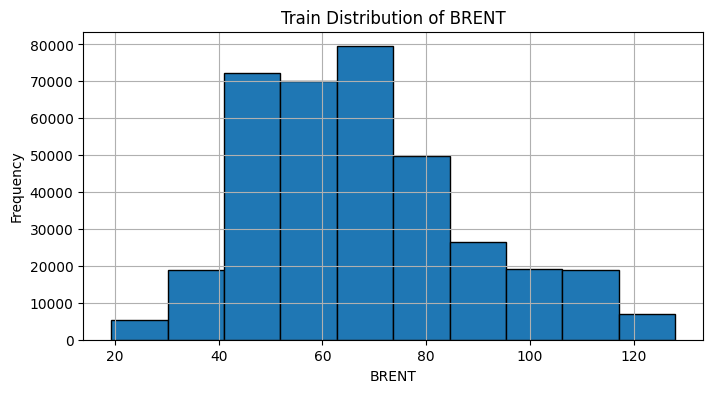

In [80]:
plt.figure(figsize=(8, 4))
plt.hist(train['BRENT'], bins=10, edgecolor='k')
plt.title(f'Train Distribution of BRENT')
plt.xlabel('BRENT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

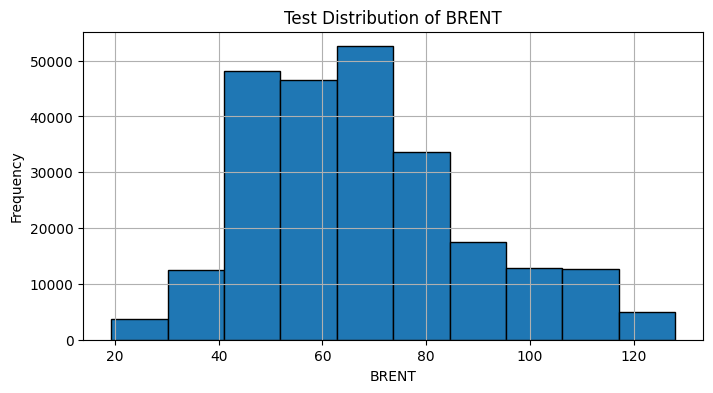

In [81]:
plt.figure(figsize=(8, 4))
plt.hist(test['BRENT'], bins=10, edgecolor='k')
plt.title(f'Test Distribution of BRENT')
plt.xlabel('BRENT')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [82]:
print(train['BRENT'].max())
print(train['BRENT'].min())

127.98
19.33


In [83]:
print(test['BRENT'].max())
print(test['BRENT'].min())

127.98
19.33


## WTI (해당일의 WTI 값)

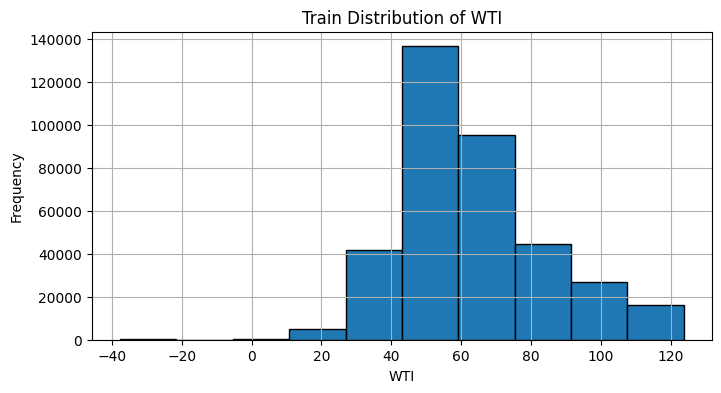

In [84]:
plt.figure(figsize=(8, 4))
plt.hist(train['WTI'], bins=10, edgecolor='k')
plt.title(f'Train Distribution of WTI')
plt.xlabel('WTI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

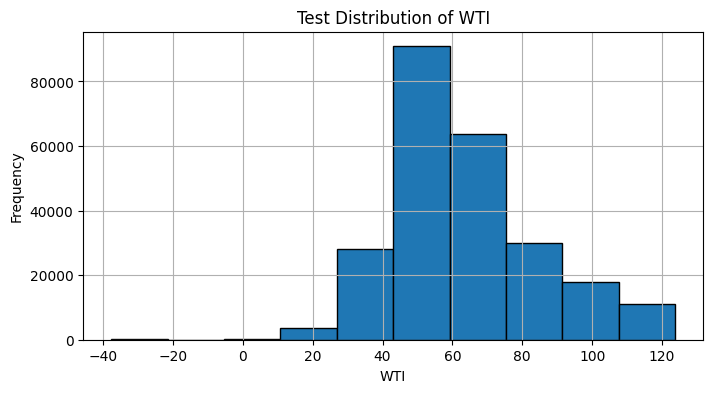

In [85]:
plt.figure(figsize=(8, 4))
plt.hist(test['WTI'], bins=10, edgecolor='k')
plt.title(f'Test Distribution of WTI')
plt.xlabel('WTI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [86]:
print(train['WTI'].max())
print(train['WTI'].min())

123.7
-37.63


In [87]:
print(test['WTI'].max())
print(test['WTI'].min())

123.7
-37.63


## BDI_ADJ (조정된 벌크운임지수)

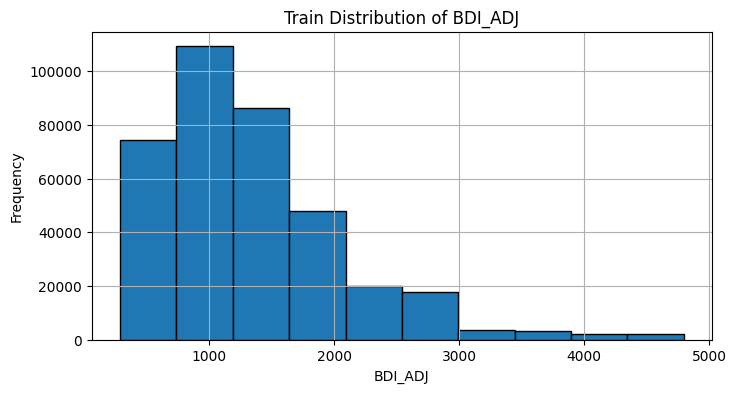

In [88]:
plt.figure(figsize=(8, 4))
plt.hist(train['BDI_ADJ'], bins=10, edgecolor='k')
plt.title(f'Train Distribution of BDI_ADJ')
plt.xlabel('BDI_ADJ')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

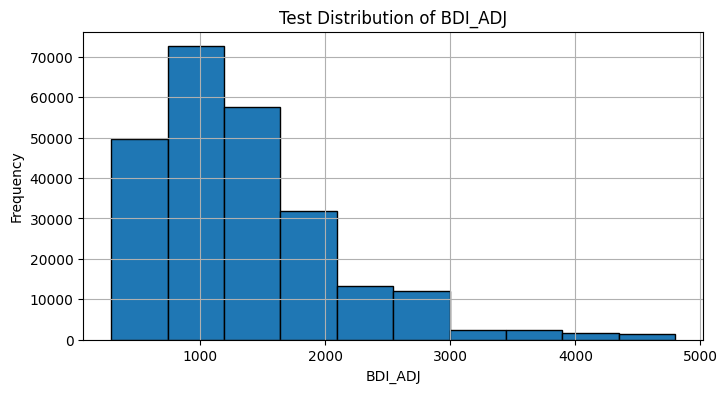

In [89]:
plt.figure(figsize=(8, 4))
plt.hist(test['BDI_ADJ'], bins=10, edgecolor='k')
plt.title(f'Test Distribution of BDI_ADJ')
plt.xlabel('BDI_ADJ')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [90]:
print(train['BDI_ADJ'].max())
print(train['BDI_ADJ'].min())

4795.865609
286.8022972


In [91]:
print(test['BDI_ADJ'].max())
print(test['BDI_ADJ'].min())

4795.865609
286.8022972


## PORT_SIZE (접안지 폴리곤 영역의 크기)

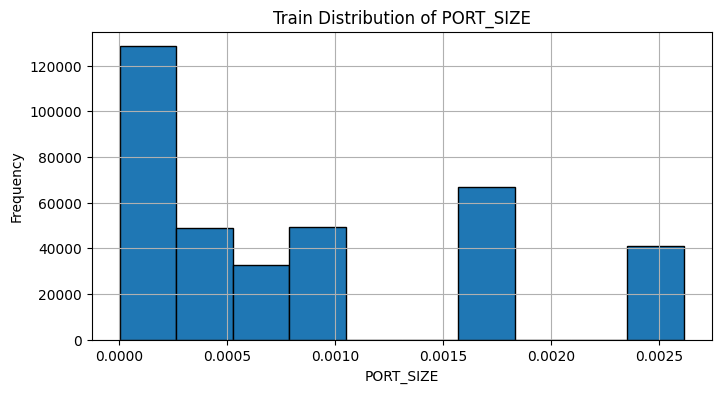

In [92]:
plt.figure(figsize=(8, 4))
plt.hist(train['PORT_SIZE'], bins=10, edgecolor='k')
plt.title(f'Train Distribution of PORT_SIZE')
plt.xlabel('PORT_SIZE')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

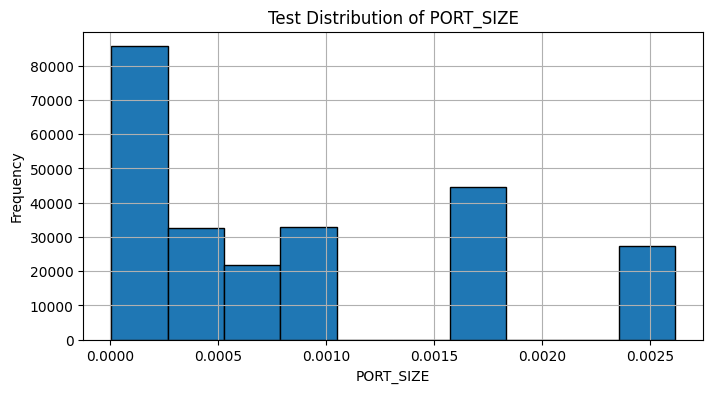

In [93]:
plt.figure(figsize=(8, 4))
plt.hist(test['PORT_SIZE'], bins=10, edgecolor='k')
plt.title(f'Test Distribution of PORT_SIZE')
plt.xlabel('PORT_SIZE')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [94]:
print(train['PORT_SIZE'].max())
print(train['PORT_SIZE'].min())

0.002615416
4.5e-06


In [95]:
print(test['PORT_SIZE'].max())
print(test['PORT_SIZE'].min())

0.002615416
4.5e-06


## CI_HOUR (대기시간)

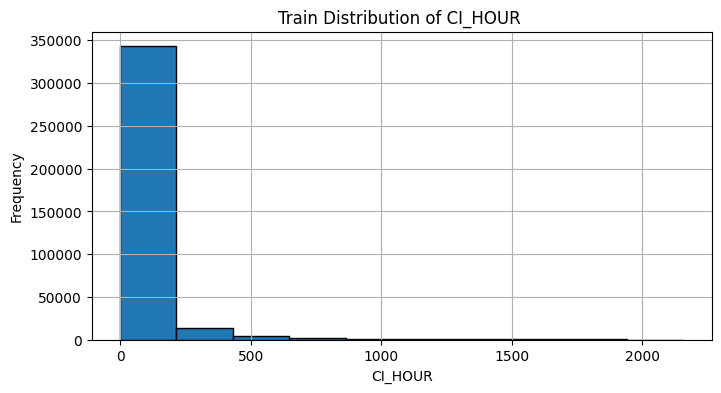

In [96]:
plt.figure(figsize=(8, 4))
plt.hist(train['CI_HOUR'], bins=10, edgecolor='k')
plt.title(f'Train Distribution of CI_HOUR ')
plt.xlabel('CI_HOUR')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [97]:
print(train['CI_HOUR'].max())
print(train['CI_HOUR'].min())

2159.130556
0.0


# 산점도 파악

In [99]:
numeric_cols = train.select_dtypes(include=[float, int])

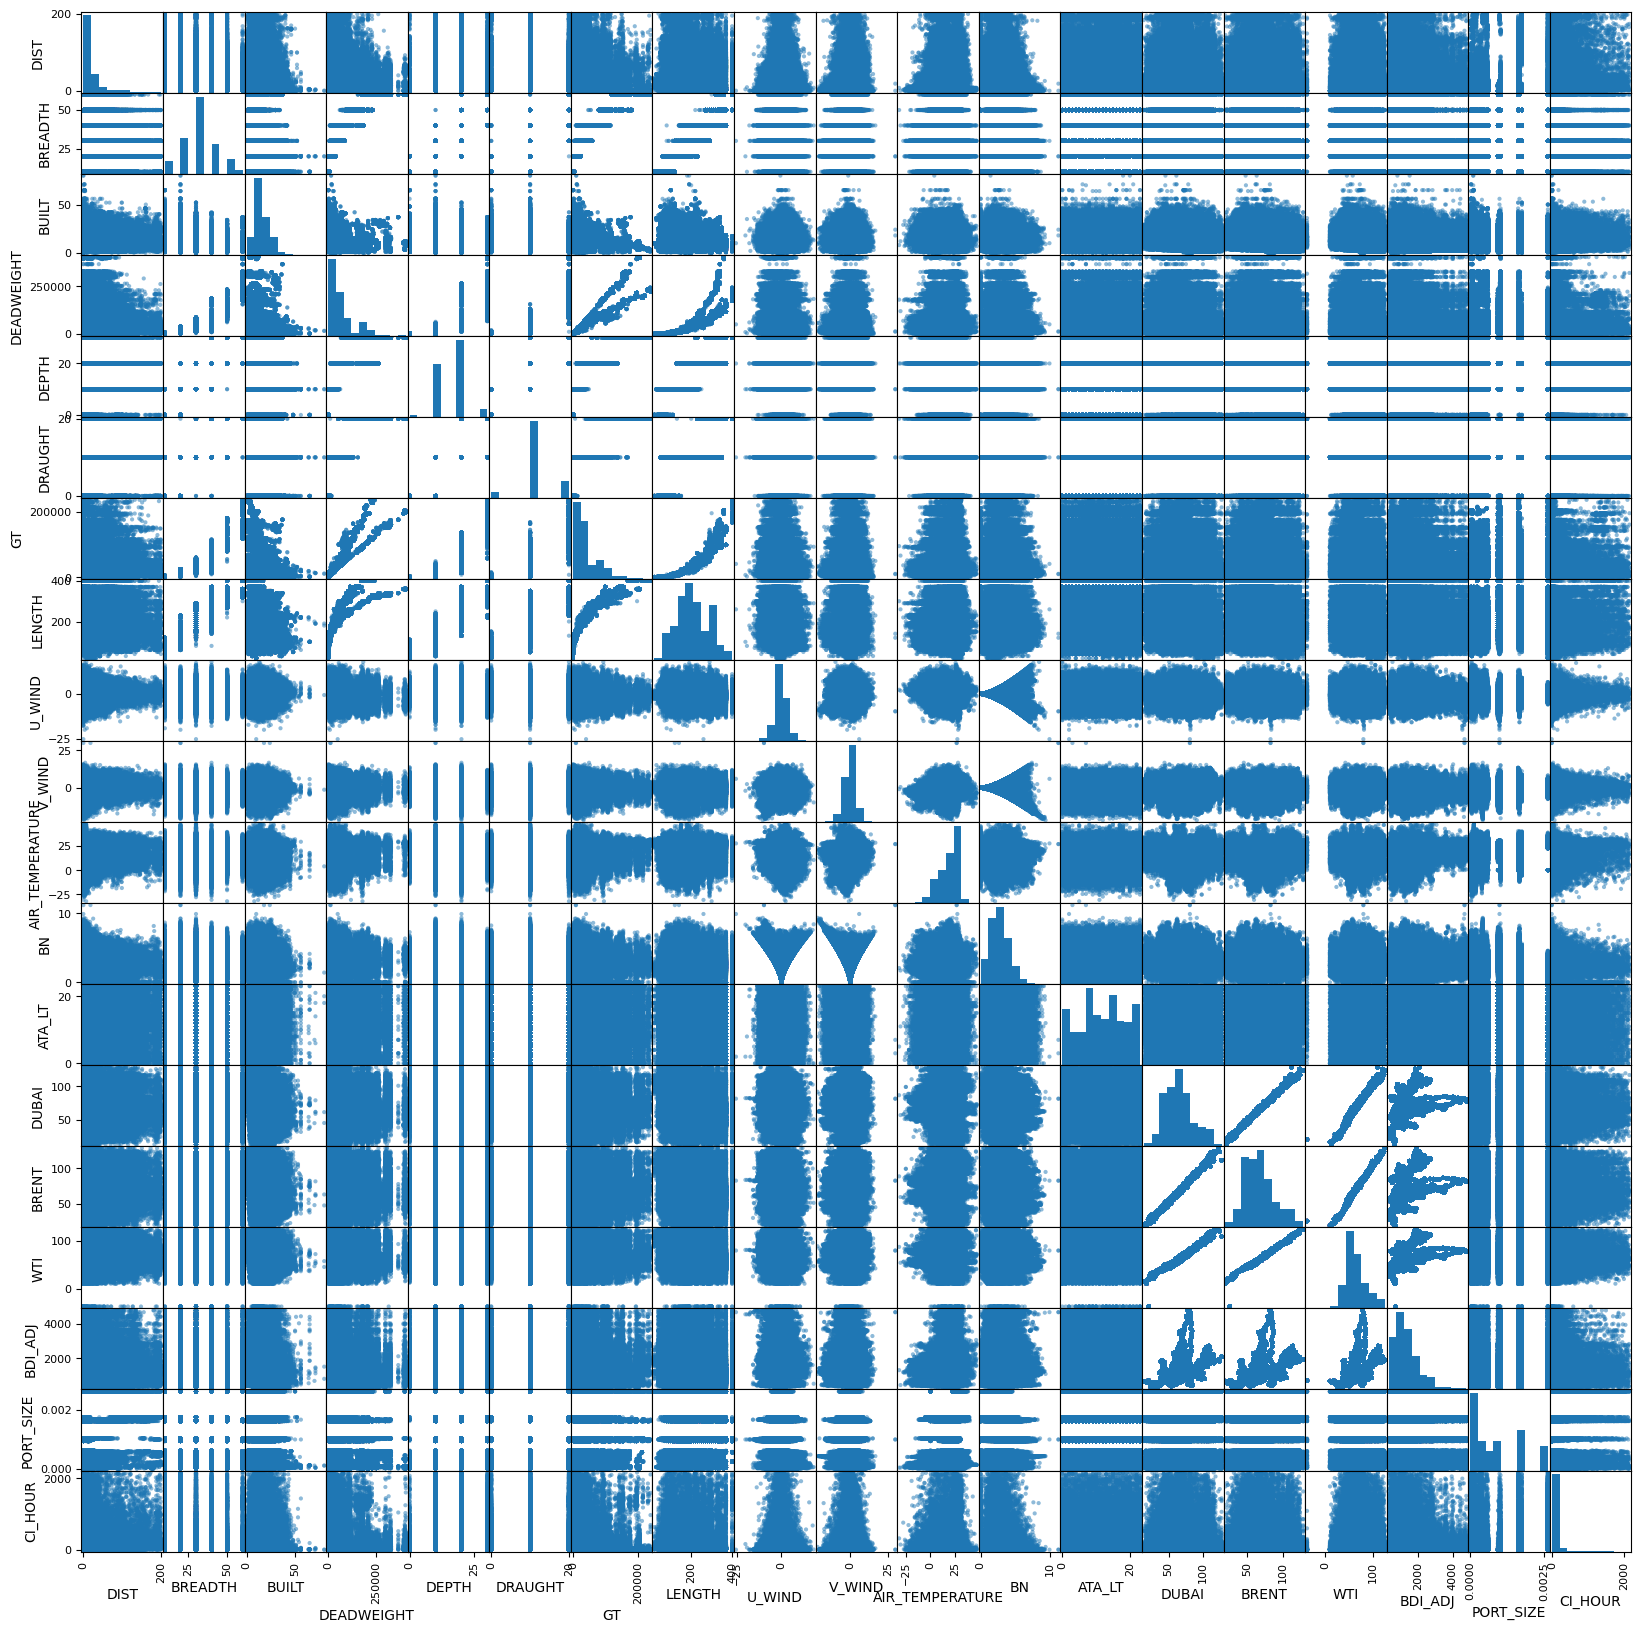

In [104]:
scatter_matrix(numeric_cols, alpha=0.5,figsize=(20,20), diagonal='hist')
plt.show()

# 상관관계

In [107]:
numeric_cols

,DIST,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,U_WIND,V_WIND,AIR_TEMPERATURE,BN,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,CI_HOUR
0,30.736578,30.0,28,73100,20.0,10.0,38600,220.0,0.14,3.77,15.9,2.730798,12,42.01,43.16,40.96,1407.668330,0.001660,3.048333
1,63.220425,30.0,15,37900,20.0,10.0,28100,220.0,-3.16,-6.72,24.5,4.289058,10,67.53,64.55,59.34,2089.046774,0.001614,17.138611
2,90.427421,50.0,7,115000,20.0,10.0,96400,300.0,0.00,0.00,9.4,0.000000,14,65.30,66.39,56.94,603.193047,0.001743,98.827500
3,0.000000,10.0,33,1490,10.0,0.0,700,70.0,4.34,-7.31,22.1,4.693735,7,43.02,43.15,41.11,1169.853455,0.000069,0.000000
4,8.813725,30.0,10,27600,10.0,10.0,19300,180.0,1.92,2.31,22.8,2.345875,14,90.45,93.65,88.11,1107.944894,0.000197,96.030556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367436,59.018184,40.0,13,93200,20.0,10.0,51300,230.0,NaN,NaN,NaN,NaN,6,61.25,62.21,55.70,1333.609109,0.000360,65.850000
367437,0.000000,10.0,9,1280,0.0,0.0,500,60.0,-0.06,0.87,17.1,1.028558,11,105.37,109.34,104.69,1955.103846,0.000552,0.000000
367438,1.768630,30.0,6,25000,20.0,10.0,25100,180.0,-0.63,3.36,31.7,2.557156,15,97.73,99.10,95.78,1601.291086,0.002615,0.997500
367439,0.000000,10.0,8,2400,10.0,0.0,750,80.0,3.74,-2.44,10.8,3.055715,19,49.75,50.08,47.02,1191.353331,0.000069,0.000000


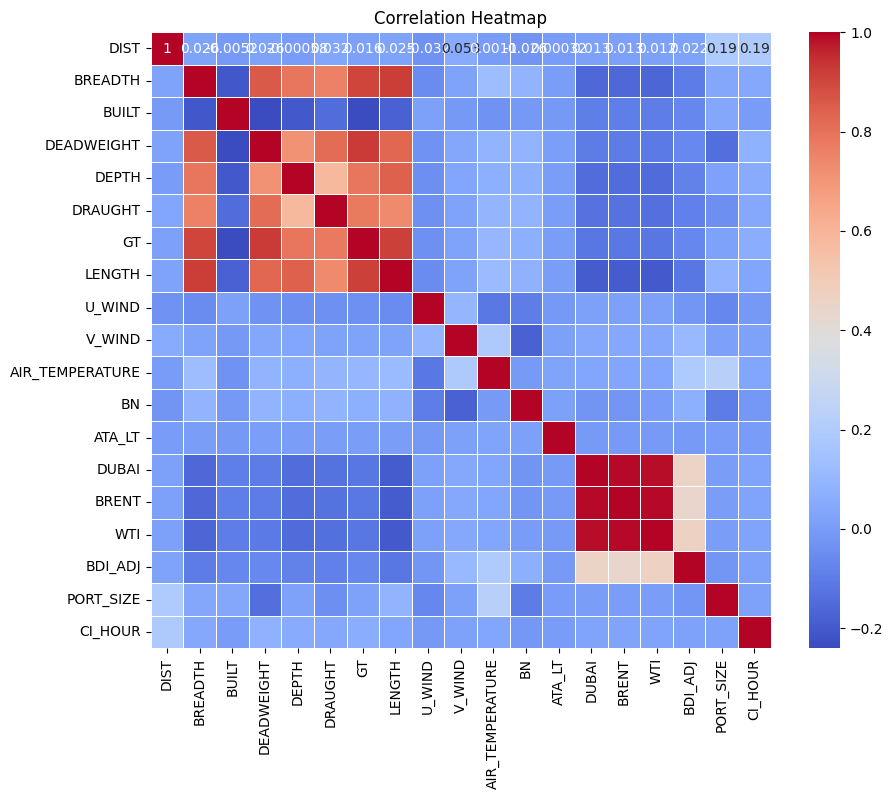

In [114]:
correlation_matrix = numeric_cols.corr()

# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5 )
plt.title("Correlation Heatmap")
plt.show()

# Date

In [99]:
train['ATA'] = pd.to_datetime(train['ATA'])
test['ATA'] = pd.to_datetime(test['ATA'])

# datetime을 여러 파생 변수로 변환
for df in [train, test]:
    df['year'] = df['ATA'].dt.year
    df['month'] = df['ATA'].dt.month
    df['day'] = df['ATA'].dt.day
    df['hour'] = df['ATA'].dt.hour
    df['minute'] = df['ATA'].dt.minute
    df['weekday'] = df['ATA'].dt.weekday

C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


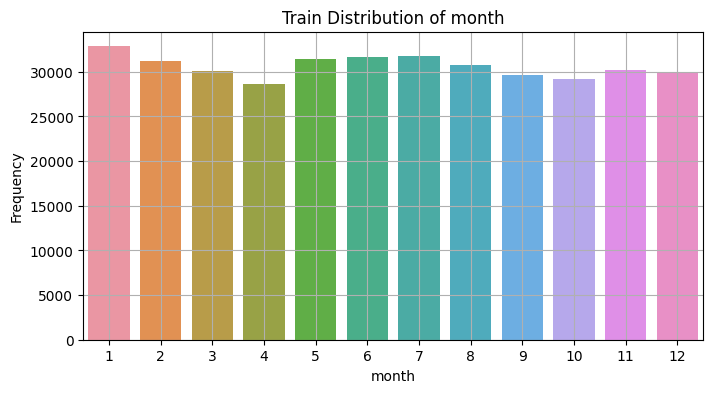

In [103]:
plt.figure(figsize=(8, 4))
sns.countplot('month',data=train)
plt.title(f'Train Distribution of month')
plt.xlabel('month')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [107]:
train.groupby('month')['CI_HOUR'].sum()

month
1     2.054721e+06
2     1.868361e+06
3     1.841429e+06
4     1.852772e+06
5     1.921335e+06
6     1.889696e+06
7     1.890270e+06
8     1.870232e+06
9     1.848421e+06
10    1.834025e+06
11    1.925145e+06
12    1.939782e+06
Name: CI_HOUR, dtype: float64

C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


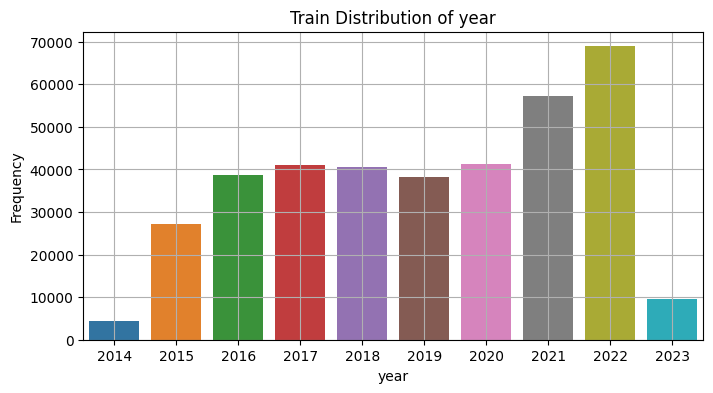

In [104]:
plt.figure(figsize=(8, 4))
sns.countplot('year',data=train)
plt.title(f'Train Distribution of year')
plt.xlabel('year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


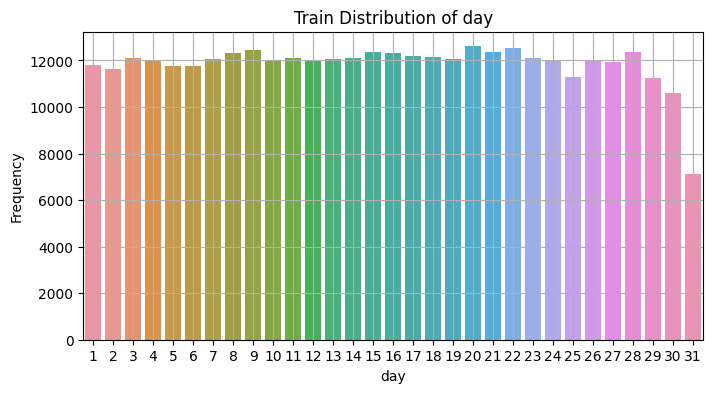

In [105]:
plt.figure(figsize=(8, 4))
sns.countplot('day',data=train)
plt.title(f'Train Distribution of day')
plt.xlabel('day')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()